In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz

In [76]:
dados = pd.read_excel('taxa_rend_escolar_2022_edit.xlsx')
dados.dropna()
display(dados)

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,TAef:Total,...,TABef:6º Ano,TABef:7º Ano,TABef:8º Ano,TABef:9º Ano,TABem:Total,TABem:1ª série,TABem:2ª série,TABem:3ª série,TABem:4ª série,TABem:Não-Seriado
0,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100,...,--,--,--,--,--,--,--,--,--,--
1,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,88.9,...,--,--,--,--,--,--,--,--,--,--
2,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,88.2,...,0,0,0,0,--,--,--,--,--,--
3,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,96.2,...,0,0,0,0,--,--,--,--,--,--
4,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEFM EURIDICE LOPES PEDROSO,Urbana,Estadual,93,...,0,1.3,1.1,--,8.4,13.4,9,2,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,2022,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,100,...,--,--,--,--,--,--,--,--,--,--
129303,2022,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,100,...,0,0,0,0,--,--,--,--,--,--
129304,2022,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,99.6,...,0,0,0,0,0,0,0,0,--,--
129305,2022,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,100,...,--,--,--,--,--,--,--,--,--,--


In [77]:
dados.columns

Index(['Ano', 'Região', 'UF', 'Código do Município', 'Nome do Município',
       'Código da Escola', 'Nome da Escola', 'Localização',
       'Dependência Administrativa', 'TAef:Total', 'TAef:Anos Iniciais',
       'TAef:Anos Finais', 'TAef:1º Ano', 'TAef:2º Ano', 'TAef:3º Ano',
       'TAef:4º Ano', ' TAef:5º Ano', 'TAef:6º Ano', 'TAef:7º Ano',
       'TAef:8º Ano', 'TAef:9º Ano', 'TAem:Total', 'TAem:1ª série',
       'TAem:2ª série', 'TAem:3ª série', 'TAem:4ª série', 'TAem:Não-Seriado',
       'TRef: Total', 'TRef:Anos Iniciais', 'TRef:Anos Finais', 'TRef:1º Ano',
       'TRef:2º Ano', 'TRef:3º Ano', 'TRef:4º Ano', ' TRef:5º Ano',
       'TRef:6º Ano', 'TRef:7º Ano', 'TRef:8º Ano', 'TRef:9º Ano',
       'TRem:Total', 'TRem:1ª série', 'TRem:2ª série', 'TRem:3ª série',
       'TRem:4ª série', 'TRem:Não-Seriado', 'TABef:Total',
       'TABef:Anos Iniciais', 'TABef:Anos Finais', 'TABef:1º Ano',
       'TABef:2º Ano', 'TABef:3º Ano', 'TABef:4º Ano', ' TABef:5º Ano',
       'TABef:6º Ano', 

In [78]:
dados = dados.replace('--', np.nan)

In [79]:
display(dados)

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,TAef:Total,...,TABef:6º Ano,TABef:7º Ano,TABef:8º Ano,TABef:9º Ano,TABem:Total,TABem:1ª série,TABem:2ª série,TABem:3ª série,TABem:4ª série,TABem:Não-Seriado
0,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11022558,EIEEF HAP BITT TUPARI,Rural,Estadual,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024291,EMMEF 7 DE SETEMBRO,Rural,Municipal,88.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024372,EMEIEF ANA NERY,Urbana,Municipal,88.2,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024666,EMEIEF BOA ESPERANCA,Rural,Municipal,96.2,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,Norte,RO,1100015,Alta Floresta D'Oeste,11024682,EEEFM EURIDICE LOPES PEDROSO,Urbana,Estadual,93.0,...,0.0,1.3,1.1,NaN,8.4,13.4,9.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,2022,Centro-Oeste,DF,5300108,Brasília,53084020,ESC PEQUENO ENCANTO,Urbana,Privada,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129303,2022,Centro-Oeste,DF,5300108,Brasília,53084039,COL ANCHIETA,Urbana,Privada,100.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
129304,2022,Centro-Oeste,DF,5300108,Brasília,53084055,COL MAPA,Urbana,Privada,99.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
129305,2022,Centro-Oeste,DF,5300108,Brasília,53085000,COBIAN - COL BIANGULO,Urbana,Privada,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
dados['TABem:Total'] = pd.to_numeric(dados['TABem:Total'], errors = 'coerce')

In [81]:
for col in dados.columns:
  if dados[col].isnull().sum() > 0:
    dados[col] = dados[col].fillna(dados[col]. mean())
dados.isnull().sum()

Ano                    0
Região                 0
UF                     0
Código do Município    0
Nome do Município      0
                      ..
TABem:1ª série         0
TABem:2ª série         0
TABem:3ª série         0
TABem:4ª série         0
TABem:Não-Seriado      0
Length: 63, dtype: int64

In [86]:
import pandas as pd
colunas_selecionadas = ['Região','UF','Localização','Dependência Administrativa']
novo_df = dados[colunas_selecionadas]
resultado_variavel = novo_df.values
display(dados)

,Ano,Região,UF,Localização,Dependência Administrativa,TABem:Total,TABem:1ª série,TABem:2ª série,TABem:3ª série,TABem:4ª série,TABem:Não-Seriado
0,2022,Norte,RO,Rural,Estadual,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
1,2022,Norte,RO,Rural,Municipal,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
2,2022,Norte,RO,Urbana,Municipal,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
3,2022,Norte,RO,Rural,Municipal,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
4,2022,Norte,RO,Urbana,Estadual,8.400000,13.400000,9.000000,2.000000,5.125997,10.202174
...,...,...,...,...,...,...,...,...,...,...,...
129302,2022,Centro-Oeste,DF,Urbana,Privada,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
129303,2022,Centro-Oeste,DF,Urbana,Privada,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174
129304,2022,Centro-Oeste,DF,Urbana,Privada,0.000000,0.000000,0.000000,0.000000,5.125997,10.202174
129305,2022,Centro-Oeste,DF,Urbana,Privada,4.563825,4.307953,4.692287,4.444238,5.125997,10.202174


In [87]:
df_encoded = pd.get_dummies(dados[['Região','UF','Localização','Dependência Administrativa']])
display(df_encoded)

,Região_Centro-Oeste,Região_Nordeste,Região_Norte,Região_Sudeste,Região_Sul,UF_AC,UF_AL,UF_AM,UF_AP,UF_BA,...,UF_SC,UF_SE,UF_SP,UF_TO,Localização_Rural,Localização_Urbana,Dependência Administrativa_Estadual,Dependência Administrativa_Federal,Dependência Administrativa_Municipal,Dependência Administrativa_Privada
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
129303,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
129304,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
129305,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [88]:
dados = pd.concat([dados, df_encoded], axis=1)

In [89]:
dados = dados.drop(['Região','UF','Localização','Dependência Administrativa'], axis=1)

In [90]:
dados[['TABem:Total']] = (dados[['TABem:Total']] > 0).astype(int)
display(dados)

,Ano,TABem:Total,TABem:1ª série,TABem:2ª série,TABem:3ª série,TABem:4ª série,TABem:Não-Seriado,Região_Centro-Oeste,Região_Nordeste,Região_Norte,...,UF_SC,UF_SE,UF_SP,UF_TO,Localização_Rural,Localização_Urbana,Dependência Administrativa_Estadual,Dependência Administrativa_Federal,Dependência Administrativa_Municipal,Dependência Administrativa_Privada
0,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2022,1,13.400000,9.000000,2.000000,5.125997,10.202174,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129302,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1
129303,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1
129304,2022,0,0.000000,0.000000,0.000000,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1
129305,2022,1,4.307953,4.692287,4.444238,5.125997,10.202174,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [91]:
features = dados.drop(['TABem:Total','TABem:Não-Seriado'], axis=1)
target = dados['TABem:Total']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape

((103445, 43), (25862, 43))

Árvore de Decisão Clássica:


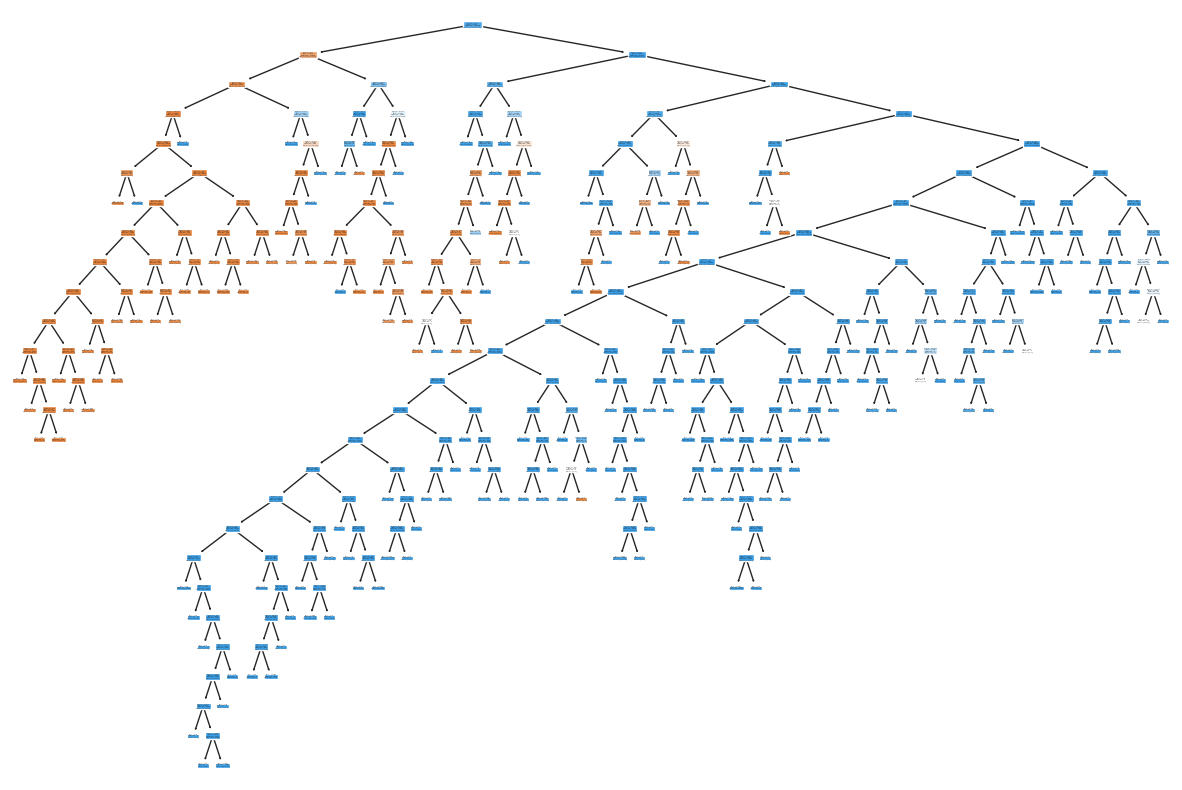

Acurácia da Árvore de Decisão Clássica: 1.00


In [92]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
print("Árvore de Decisão Clássica:")
# Criar e treinar o modelo de árvore de decisão
model_classic = DecisionTreeClassifier()
model_classic.fit(xtrain, ytrain)

# Plotar a árvore de decisão clássica
plt.figure(figsize=(15, 10))
plot_tree(model_classic, filled=True)
plt.show()

# Fazer previsões nos dados de teste
y_pred_classic = model_classic.predict(xtest)

# Calcular a acurácia do modelo
accuracy_classic = accuracy_score(ytest, y_pred_classic)
print(f'Acurácia da Árvore de Decisão Clássica: {accuracy_classic:.2f}')


Árvore de Decisão com Profundidade Limitada:


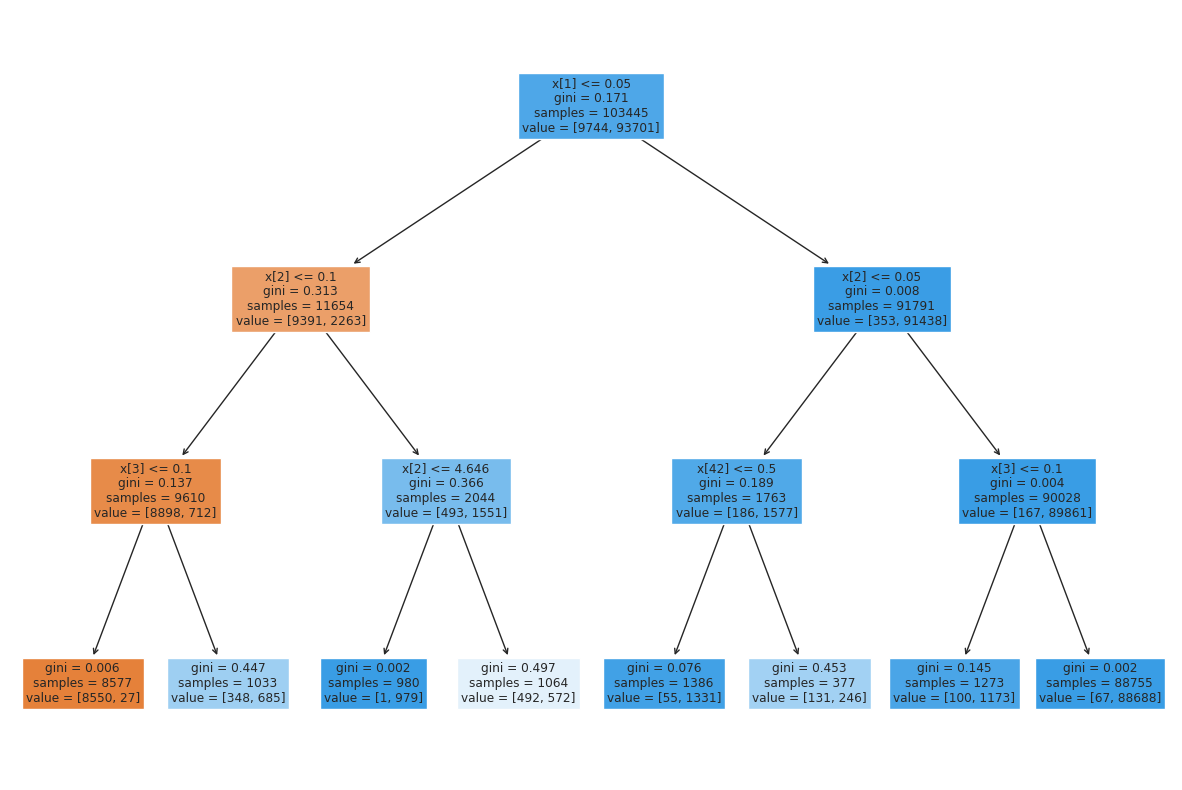

Acurácia da Árvore de Decisão com Profundidade Limitada: 0.99


In [93]:
print("\nÁrvore de Decisão com Profundidade Limitada:")
# Criar e treinar o modelo de árvore de decisão com profundidade limitada
model_depth_limited = DecisionTreeClassifier(max_depth=3)
model_depth_limited.fit(xtrain, ytrain)

# Plotar a árvore de decisão com profundidade limitada
plt.figure(figsize=(15, 10))
plot_tree(model_depth_limited, filled=True)
plt.show()

# Fazer previsões nos dados de teste
y_pred_depth_limited = model_depth_limited.predict(xtest)

# Calcular a acurácia do modelo
accuracy_depth_limited = accuracy_score(ytest, y_pred_depth_limited)
print(f'Acurácia da Árvore de Decisão com Profundidade Limitada: {accuracy_depth_limited:.2f}')


Árvore de Decisão com Critério Gini:


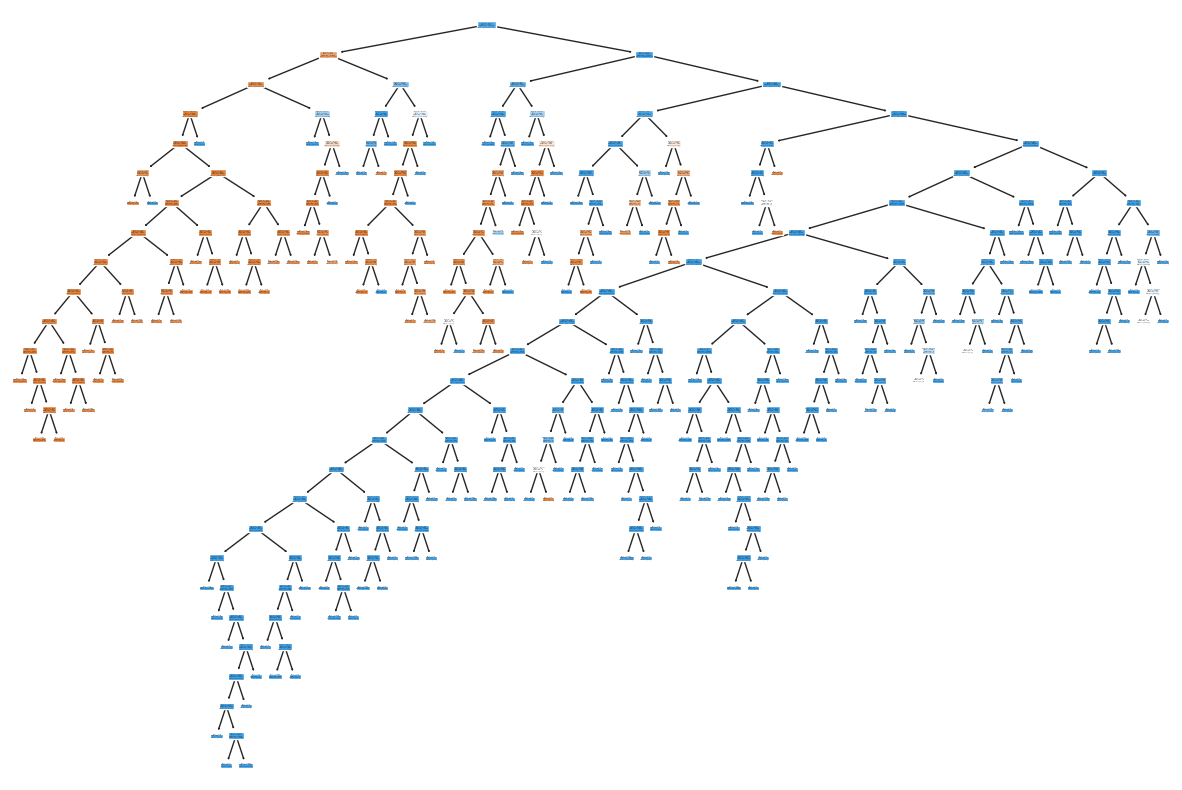

Acurácia da Árvore de Decisão com Critério Gini: 1.00


In [94]:
print("\nÁrvore de Decisão com Critério Gini:")
# Criar e treinar o modelo de árvore de decisão com critério Gini
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(xtrain, ytrain)

# Plotar a árvore de decisão com critério Gini
plt.figure(figsize=(15, 10))
plot_tree(model_gini, filled=True)
plt.show()

# Fazer previsões nos dados de teste
y_pred_gini = model_gini.predict(xtest)

# Calcular a acurácia do modelo
accuracy_gini = accuracy_score(ytest, y_pred_gini)
print(f'Acurácia da Árvore de Decisão com Critério Gini: {accuracy_gini:.2f}')

NÃO ENTENDI
